# 실제 데이터로 한번 연습해보자! 
### 문제 1
1. `Energy Indicators.xls` 에서 데이터 (2013년의 에너지 공급과 재생 전기 생산) 읽어서 energy라는 변수에 저장하기.
   Column의 이름은 `['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

2. Missing Data는 NaN (Not a Number)로 표시할것

3. `Energy Supply`의 단위를 gigajoules로 바꾸기 (1,000,000 gigajours = 1 petajoule)

4. 숫자/괄호가 포함된 나라이름들에서 이들을 제거하기

e.g. 

`'Bolivia (Plurinational State of)'` -> `'Bolivia'`, 

`'Switzerland17'` -> `'Switzerland'`.

5. 다음의 나라들의 이름을 다음과 같이 바꿀것

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

6. `world_bank.csv`에서 각 나라들의 1960~2015년의 GDP를 저장한 데이터를 읽어 들여 GDP라는 변수에 저장할것

7. 다음 나라들의 이름을 바꿔줄것


```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```


8.`scimagojr-3.xlsx`에서 데이터 ([Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology]분야에서의 각 나라의 저널 공헌도)를 읽어들여서 ScimEn에 저장할것 

9.GDP, Energy, ScimEn 이 세 데이터를 새로운 데이터 셋으로 합치고 (country name의 교집합을 이용하여), 2006-2015년의 GDP데이터와 ScimEn의 Top 15나라들만 데이터에 저장할것.

(데이터 프레임의 인덱스는 국가 이름, 컬럼은 ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].)


In [1]:
# GDP 랑 Document의 관계가 있는가?
# GDP랑 Citation?
# GDP Citations per documents
import numpy as np
import pandas as pd
FilePath = './Data/'

In [2]:
ScimEn =pd.read_excel(FilePath + 'scimagojr-3.xlsx', 
                      na_values='...',
                      index_col='Country')
ScimEn.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.7,138
United States,2,96661,94747,792274,265436,8.2,230


In [3]:
ScimEn = (ScimEn.where(ScimEn['Rank'] <= 15)
                .dropna())

In [4]:
TopCountries = ScimEn.index
TopCountries

Index(['China', 'United States', 'Japan', 'United Kingdom',
       'Russian Federation', 'Canada', 'Germany', 'India', 'France',
       'South Korea', 'Italy', 'Spain', 'Iran', 'Australia', 'Brazil'],
      dtype='object', name='Country')

In [23]:
cols = (np.arange(2006,2016)
          .astype(str)
          .tolist())
cols.append('Country Name')

GDP = pd.read_csv(FilePath+'world_bank.csv',
              skiprows=4,
              na_values='...',
              index_col='Country Name',
              usecols=cols)
GDP.head(2)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [24]:
idx = GDP.index
CountriesNotIn = ~TopCountries.isin(idx)
TopCountries[CountriesNotIn]

Index(['South Korea', 'Iran'], dtype='object', name='Country')

In [25]:
idx[idx.str.contains('Korea')]

Index(['Korea, Rep.', 'Korea, Dem. People’s Rep.'], dtype='object', name='Country Name')

In [26]:
idx[idx.str.contains('Iran')]

Index(['Iran, Islamic Rep.'], dtype='object', name='Country Name')

In [27]:
GDP.rename(index = {'Korea, Rep.':'South Korea',
                    'Iran, Islamic Rep.':'Iran'}, inplace=True)

In [28]:
GDP.loc[TopCountries.to_list()]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [32]:
# GDP, energy, ScimEn 세 데이터 프레임을 공통된 index (나라이름)를 기준으로 합쳐줄거임
df= pd.merge(ScimEn, GDP, how='inner',  # inner 는 교집합을 의미함
                        left_index=True, right_index=True)  # 뭐를 기준으로 교집합을 정할지 -> index를 기준으로 하겠다
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10.0,11983.0,11923.0,114675.0,22595.0,9.57,104.0,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


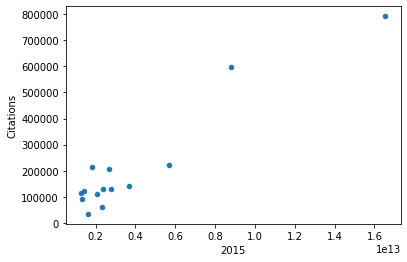

In [34]:
df.plot(x = '2015', y = 'Citations', kind='scatter')

### 문제 2
지난 10년간 각 나라의 GDP 평균은 얼마냐? (missing value들은 계산에서 제외)

In [ ]:
# Quiz! 왜 copy를 하는걸까?
TOP15 = ans1.copy()

years = np.arange(2006,2016).astype(str).tolist()
avgGDP = TOP15[years].mean(axis=1).sort_values(ascending=False)

avgGDP

### 문제 3
10년간의 GDP평균이 6번째로 큰 나라는 어디?
그나라는 10년사이에 GDP가 얼마나 변했나?

In [ ]:
sixth_country = avgGDP.index[5]
print('여섯번째로 10년간 평균 GDP가 큰 나라는', sixth_country)

GDP_CHANGE = TOP15.loc[sixth_country][years][-1]-TOP15.loc[sixth_country][years][0]
GDP_CHANGE

### 문제 4
`Energy Supply per Capita` 의 평균은?

In [ ]:
ESmean = TOP15['Energy Supply per Capita'].mean()
ESmean

### 문제 5
어느 나라가 가장 큰 % Renewable을 가지고 있냐?
그 나라의 % Renewable은 얼마냐?


In [ ]:
country = TOP15['% Renewable'].idxmax()
percentage = TOP15.loc['Brazil']['% Renewable']
(country, percentage)

### 문제 6
사람당 Citable Documents를 추정하는 Column을 만들어라.
사람당 Citable Documents와 사람당 Energy supply사이의 피어슨 상관계수는?


In [ ]:
new_column = TOP15['Citable documents']/TOP15['Energy Supply']*TOP15['Energy Supply per Capita']
corr = new_column.corr(TOP15['Energy Supply per Capita'])

corr

### 문제 7
Top15의 국가중에 % Renewable 값이 평균 이상인 나라는 1, 아닌 나라는 0의 값을 주는 새로운 컬럼을 만들어라

In [ ]:
mean_percentage =TOP15['% Renewable'].mean()
HighRenew= TOP15['% Renewable']
TOP15[TOP15['% Renewable'] < mean_percentage] = 0
TOP15[TOP15['% Renewable'] >= mean_percentage] = 1

HighRenew

### 문제 8
다음 Dictionary를 이용해 나라들을 대륙별로 묶어라.
예측 인구수의 Column을 새로 만들고 (Estimated Population = Energy Supply/Energy Supply per capita),
대륙별 나라의 수, 추정인구의 합계, 평균, 표준편차를 구하라 

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}


In [ ]:
TOP15 = ans1.copy()
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}

TOP15['Estimated Population'] = TOP15['Energy Supply']/TOP15['Energy Supply per Capita']

df = pd.DataFrame.from_dict(ContinentDict, orient='index').rename(columns={0:'Continent'})
df = pd.merge(TOP15, df, left_index=True, right_index=True)

df = df.pivot_table(index='Continent',values='Estimated Population', aggfunc= [np.size, np.sum,np.mean, np.std])


df


